In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [8]:
data=pd.read_csv('heart.csv')

In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
data.shape

(1025, 14)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data==data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1021,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1022,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1023,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
df

NameError: name 'df' is not defined

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 3.EDA

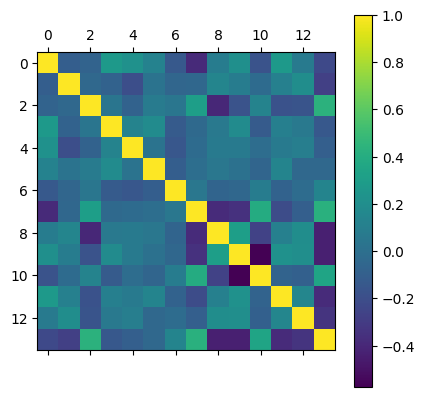

In [18]:
plt.matshow(data.corr())
plt.colorbar()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

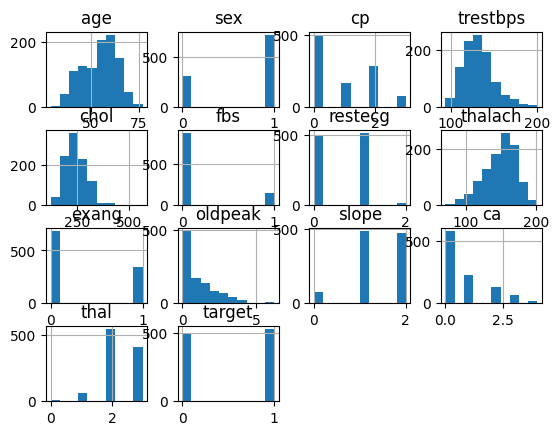

In [16]:
data.hist()

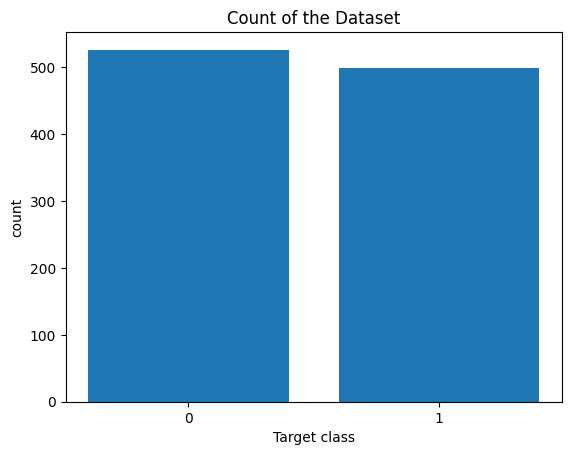

In [17]:
plt.bar(data['target'].unique(), data['target'].value_counts())
plt.xticks([0,1])
plt.xlabel("Target class")
plt.ylabel("count")
plt.title("Count of the Dataset")
plt.show()

## Preprocessing

In [19]:
data = pd.get_dummies(data, columns=['sex', 'cp','restecg','exang','ca','slope','thal'])

In [20]:
stand_scale= StandardScaler()
col_2_scale = ['age','trestbps','chol','thalach','oldpeak']
data[col_2_scale]=stand_scale.fit_transform(data[col_2_scale])

## EVAL

In [21]:
x=data.drop(['target'],axis=1)
y=data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.25)

## Perform SVC

In [23]:
svc_score= []
kernels = ['linear','rbf','sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(x_train,y_train)
    svc_score.append(svc_classifier.score(x_test,y_test))
    

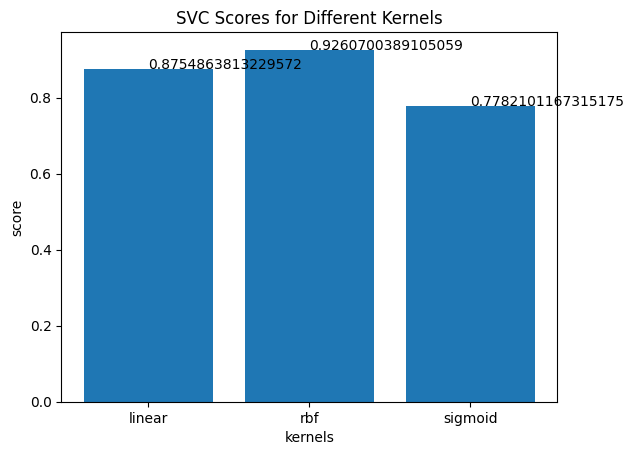

In [24]:

plt.bar(kernels,svc_score)
for i in range(len(kernels)):
    plt.text(i, svc_score[i], svc_score[i])
plt.xlabel('kernels')
plt.ylabel('score')
plt.title("SVC Scores for Different Kernels")
plt.show()

#### DECISION TREE CLASSIFIER

In [25]:
dt_score  = []
for i in range(1, len(x.columns)+1):
    dt_classifier =  DecisionTreeClassifier(max_features=i)
    dt_classifier.fit(x_train,y_train)
    dt_score.append(dt_classifier.score(x_test,y_test))
    

In [26]:
print(dt_score)

[0.9883268482490273, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544, 0.9766536964980544, 0.9883268482490273, 0.9883268482490273, 0.9883268482490273, 0.9883268482490273, 0.9883268482490273, 0.9883268482490273, 0.9766536964980544, 0.9766536964980544, 0.9766536964980544, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544, 0.9883268482490273, 0.9883268482490273, 0.9766536964980544, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544, 0.9883268482490273, 0.9766536964980544]


In [ ]:

plt.plot([i for i in range(1, len(x.columns)+1)],dt_score)
for i in range(1, len(x.columns)+1):
    plt.